**1. NDBC Data in CSV or txt format**
</div>

The National Data Buoy Center's home page: https://www.ndbc.noaa.gov/
![picture](https://drive.google.com/uc?export=view&id=14bCnO6rBgTLPhuVo493zrpfOt_XemFlQ)

NDBC is the premier source of meteorological and oceanographic measurements for the marine environment.

Taking the station of 41025 at Diamond Shoals as the example, you can download the historical Standard meteorological data manually by right
clicking the file links (https://www.ndbc.noaa.gov/station_history.php?station=41025). To download files for multiple stations and multiple years, we can use Python code for batch processing.

The package of urllib will be used - urllib is a package working with URLs. We will learn how to save the file in csv format, read the files and make plot in python.

**CSV is short for "Comma Separated Values".**

## **1.1 Download NDBC standard meteorological files**

In [ ]:
# urllib.request for opening and reading URLs
import urllib.request

# for single file download
urllib.request.urlretrieve('https://www.ndbc.noaa.gov/view_text_file.php?filename=41025h2022.txt.gz&dir=data/historical/stdmet/','41025h2022.csv')

('41025h2022.csv', <http.client.HTTPMessage at 0x7d88a8119270>)

In [ ]:
!pwd
!ls


/content
41025h2022.csv	sample_data


In [ ]:
# to download mutiple stations for multiple years:

#pick three stations of Diomand Shoals, NC, Cape Hatteras East, NC and Oregon Inlet, NC.
stations =[41025,41120,44095]
years=range(1994,2024)
for index,st in enumerate(stations):
  for year in years:
    url = 'https://www.ndbc.noaa.gov/view_text_file.php?filename='+str(st)+'h'+str(year)+'.txt.gz&dir=data/historical/stdmet/'
    print('station '+str(st)+' in '+str(year)+': url '+url)
    #print(url); break
    fname = str(st)+'h'+str(year)+'.csv'
    print("saved as: "+fname)
    urllib.request.urlretrieve(url,fname)


station 41025 in 2021: url https://www.ndbc.noaa.gov/view_text_file.php?filename=41025h2021.txt.gz&dir=data/historical/stdmet/
saved as: 41025h2021.csv
station 41025 in 2022: url https://www.ndbc.noaa.gov/view_text_file.php?filename=41025h2022.txt.gz&dir=data/historical/stdmet/
saved as: 41025h2022.csv
station 41120 in 2021: url https://www.ndbc.noaa.gov/view_text_file.php?filename=41120h2021.txt.gz&dir=data/historical/stdmet/
saved as: 41120h2021.csv
station 41120 in 2022: url https://www.ndbc.noaa.gov/view_text_file.php?filename=41120h2022.txt.gz&dir=data/historical/stdmet/
saved as: 41120h2022.csv
station 44095 in 2021: url https://www.ndbc.noaa.gov/view_text_file.php?filename=44095h2021.txt.gz&dir=data/historical/stdmet/
saved as: 44095h2021.csv
station 44095 in 2022: url https://www.ndbc.noaa.gov/view_text_file.php?filename=44095h2022.txt.gz&dir=data/historical/stdmet/
saved as: 44095h2022.csv


## **1.2 Read files**
From DataCamp, we know we can read CSV files to python as **Pandas DataFrame**.
You can imagine DataFrame as a table with rows and columns.

Before that, let's check the working directory to make sure the files are there.

In [ ]:
# pwd: print working directory
#path = %pwd
# The OS module in Python provides functions for creating and removing a directory (folder),
# fetching its content, changing and identying the current directory, etc
#import os
#os.listdir(path)
# to remove files
# os.remove('41120.csv')
!ls


41025h2021.csv	41120h2021.csv	44095h2021.csv	sample_data
41025h2022.csv	41120h2022.csv	44095h2022.csv


In [ ]:
import pandas as pd
# stdmet = pd.read_csv('41025h2022.csv', skiprows=0, delimiter=' ')
# with error. Because it expects one and only one space

stdmet = pd.read_csv('41025h2022.csv', skiprows=0, delimiter='\s+')

<ipython-input-14-1dba2f9c480a>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  stdmet = pd.read_csv('41025h2022.csv', skiprows=0, delimiter='\s+')


In [ ]:
print(type(stdmet))
print(stdmet)
stdmet = stdmet.drop([0]) #method
print(stdmet)
print(stdmet.shape)

<class 'pandas.core.frame.DataFrame'>
        #YY  MM  DD  hh  mm  WDIR WSPD  GST   WVHT    DPD    APD   MWD  \
0       #yr  mo  dy  hr  mn  degT  m/s  m/s      m    sec    sec  degT   
1      2022  01  01  00  00   205  3.8  5.2  99.00  99.00  99.00   999   
2      2022  01  01  00  10   204  3.6  5.1  99.00  99.00  99.00   999   
3      2022  01  01  00  20   199  4.2  5.7  99.00  99.00  99.00   999   
4      2022  01  01  00  30   199  4.6  6.1  99.00  99.00  99.00   999   
...     ...  ..  ..  ..  ..   ...  ...  ...    ...    ...    ...   ...   
52522  2022  12  31  23  10   208  6.5  8.1   99.0   99.0   99.0   999   
52523  2022  12  31  23  20   213  6.3  8.1   99.0   99.0   99.0   999   
52524  2022  12  31  23  30   213  6.3  7.8   99.0   99.0   99.0   999   
52525  2022  12  31  23  40   211  6.1  8.0   99.0   99.0   99.0   999   
52526  2022  12  31  23  50   204  5.4  6.5   99.0   99.0   99.0   999   

         PRES   ATMP  WTMP   DEWP   VIS   TIDE  
0         hPa   degC  de

## **1.3 View and plot data**


In [ ]:
# print out the first row as dataframe
print('The first row of stmet:')
print(stdmet.iloc[[0]])

# print out the colume of water temperature ('WTMP')
print('-----------------')
wtmp = stdmet.loc[:,'WTMP']
print('Water temperature:')
print(wtmp)
print(type(wtmp[1]))

stdmet.WTMP

The first row of stmet:
    #YY  MM  DD  hh  mm WDIR WSPD  GST   WVHT    DPD    APD  MWD    PRES  \
1  2022  01  01  00  00  205  3.8  5.2  99.00  99.00  99.00  999  1016.4   

   ATMP  WTMP  DEWP   VIS   TIDE  
1  18.5  23.7  17.8  99.0  99.00  
-----------------
Water temperature:
1        23.7
2        23.7
3        23.7
4        23.7
5        23.7
         ... 
52522    20.4
52523    20.4
52524    20.4
52525    20.5
52526    20.5
Name: WTMP, Length: 52526, dtype: object
<class 'str'>


1        23.7
2        23.7
3        23.7
4        23.7
5        23.7
         ... 
52522    20.4
52523    20.4
52524    20.4
52525    20.5
52526    20.5
Name: WTMP, Length: 52526, dtype: object

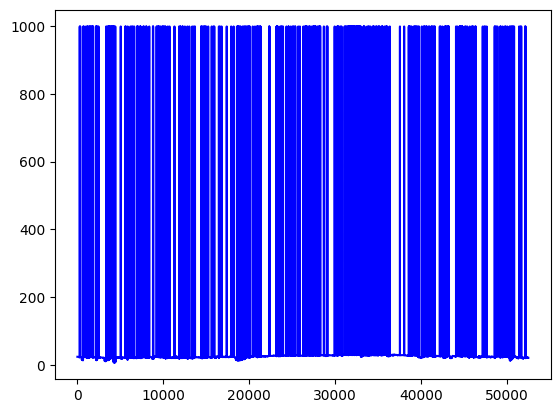

In [ ]:
# convert each element to float
wtmp = wtmp.apply(float)
# plot water temperature
import matplotlib.pyplot as plt
plt.plot(wtmp,'b')

In [ ]:
wtmp[wtmp>800]

275      999.0
331      999.0
678      999.0
756      999.0
997      999.0
         ...  
51454    999.0
51608    999.0
51701    999.0
52150    999.0
52200    999.0
Name: WTMP, Length: 404, dtype: float64

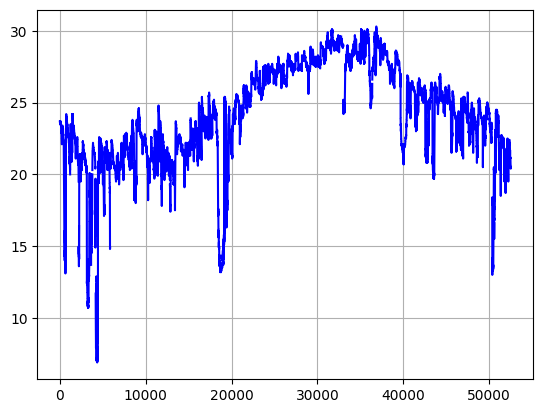

In [ ]:
NaN = float('nan')
wtmp[(wtmp==999.0)] = NaN
plt.plot(wtmp,'b')
plt.grid(True)

###***Data manipulation***

In marine science data analysis and visualization, we often need to manipulate dates and times, and format and parse dates and times in various formats.

Pylib has a session talking about dates and times manipulation (convert between datenum and date timestring).

Here, we are going to use **pandas datetime** properties.

In [ ]:
print(stdmet.iloc[:,0:5])
#stdmet['datestr']=stdmet[['#YY','MM','DD','hh','mm']].astype(str).apply('-'.join,axis=1)
stdmet['datestr']=stdmet.iloc[:,0:5].astype(str).apply('-'.join,axis=1)
print(stdmet['datestr'])

        #YY  MM  DD  hh  mm
1      2022  01  01  00  00
2      2022  01  01  00  10
3      2022  01  01  00  20
4      2022  01  01  00  30
5      2022  01  01  00  40
...     ...  ..  ..  ..  ..
52522  2022  12  31  23  10
52523  2022  12  31  23  20
52524  2022  12  31  23  30
52525  2022  12  31  23  40
52526  2022  12  31  23  50

[52526 rows x 5 columns]
1        2022-01-01-00-00
2        2022-01-01-00-10
3        2022-01-01-00-20
4        2022-01-01-00-30
5        2022-01-01-00-40
               ...       
52522    2022-12-31-23-10
52523    2022-12-31-23-20
52524    2022-12-31-23-30
52525    2022-12-31-23-40
52526    2022-12-31-23-50
Name: datestr, Length: 52526, dtype: object


In [ ]:
pd_time=pd.to_datetime(stdmet['datestr'],format='%Y-%m-%d-%H-%M')
print(pd_time)
#stdmet.iloc[:,0:5].apply('-',join,axis=1)

1       2022-01-01 00:00:00
2       2022-01-01 00:10:00
3       2022-01-01 00:20:00
4       2022-01-01 00:30:00
5       2022-01-01 00:40:00
                ...        
52522   2022-12-31 23:10:00
52523   2022-12-31 23:20:00
52524   2022-12-31 23:30:00
52525   2022-12-31 23:40:00
52526   2022-12-31 23:50:00
Name: datestr, Length: 52526, dtype: datetime64[ns]


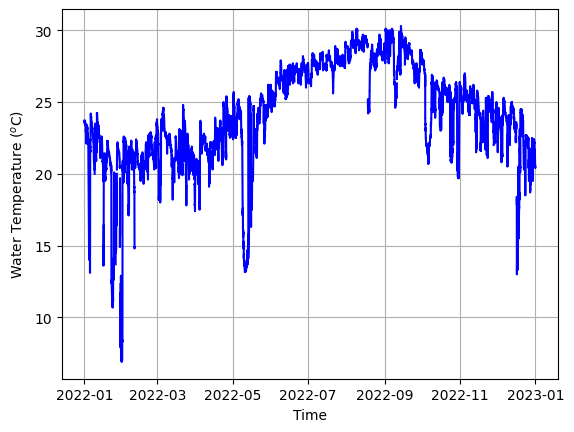

In [ ]:
# change each element in the pandas series to integer, and then change the pandas series to list
# year = stdmet.loc[:,'#YY'].apply(int).tolist()
# month = stdmet.loc[:,'MM'].apply(int).tolist()
# day = stdmet.loc[:,'DD'].apply(int).tolist()
# hr = stdmet.loc[:,'hh'].apply(int).tolist()
# mnt = stdmet.loc[:,'mm'].apply(int).tolist()
plt.plot(pd_time,wtmp,c='b')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Water Temperature ($^o$C)')
plt.show()

#time=pd.to_datetime(['2021-1-1','2021-1-2'],format='%Y-%m-%d')
#time=datenum(time.values.astype('str')).astype(float)
#print(time)


###***Use pylib commands for plot***


For programmers who are familar with MATLAB, pylib is your friend.
Next let's use pylib to make plots.

In [ ]:
#!pip install git+https://github.com/wzhengui/pylibs.git
!pip install pylibs-ocean

In [ ]:
from pylib import *

41025h2021.csv	41120h2021.csv	44095h2021.csv	clkn7h2021.csv	sample_data
41025h2022.csv	41120h2022.csv	44095h2022.csv	Elev_41025.png


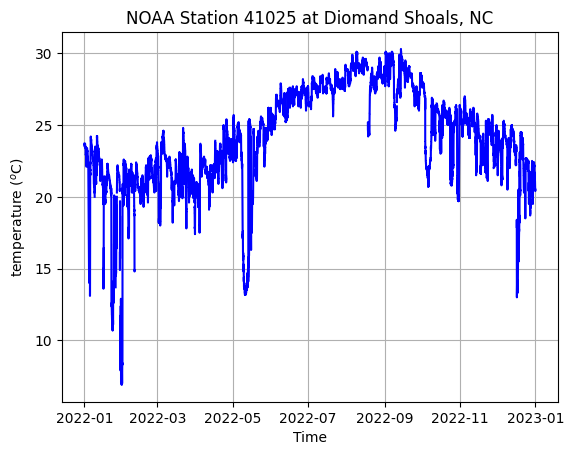

In [ ]:
xts,xls=get_xtick(fmt=2,xts=[datenum(2022,1,1),datenum(2023,1,1)],str='%Y-%m-%d')

plot(pd_time,wtmp,'b')
grid(True)
ylabel('temperature ($^o$C)')
xlabel('Time')
title('NOAA Station 41025 at Diomand Shoals, NC')
savefig('Elev_41025.png')
#set(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2022,1,1),datenum(2023,1,1)])
#os.listdir()
!ls

# **Excercise**
Please download standard meteorological data at station CLKN7 in 2021 and plot air temperature for the station in 2021.

In [ ]:
# urllib.request for opening and reading URLs
import urllib.request

In [ ]:
# in pylib, urlsave is the alias for urllib.request.urlretrieve
# use urllib.request.urlretrieve or urlsave to download Standard Meteorologial data at CLKN7 in 2021:



('clkn7h2021.csv', <http.client.HTTPMessage at 0x7cf02d44b0a0>)

In [ ]:
import pandas as pd
# using pandas to read the csv file (correct the command below)
stdmet = pd.read_csv('?????????', skiprows=0, delimiter='\s+')

In [ ]:
stdmet.info()

In [ ]:
print(type(stdmet))
print(stdmet)
stdmet = stdmet.drop([0]) #method
print(stdmet)
print(stdmet.shape)

In [ ]:
print('The first row of stmet:')
print(stdmet.iloc[[0]])

# Read the right variable, ATMP (for air temperature)
atmp = stdmet.loc[:,XXXXXXX] #debug this line

print('Air temperature:')
print(atmp)
print(type(atmp[1]))

The first row of stmet:
    #YY  MM  DD  hh  mm WDIR WSPD  GST   WVHT    DPD    APD  MWD    PRES  \
1  2021  01  01  00  00  189  5.3  5.9  99.00  99.00  99.00  999  1023.3   

   ATMP   WTMP   DEWP   VIS   TIDE  
1  17.8  999.0  999.0  99.0  99.00  
Air temperature:
1       17.8
2       17.9
3       18.6
4       16.9
5       16.9
        ... 
8576    17.0
8577    16.7
8578    17.4
8579    18.3
8580    17.4
Name: ATMP, Length: 8580, dtype: object
<class 'str'>


In [ ]:
atmp = atmp.apply(float)
import matplotlib.pyplot as plt

atmp[atmp>800]

NaN = float('nan')
atmp[(atmp==999.0)] = NaN

# Make the plot

